### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 
 
 
#### A term deposit is a fixed-term investment that includes the deposit of money into an account at a financial institution. Term deposit investments usually carry short-term maturities ranging from one month to a few years and will have varying levels of required minimum deposits

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df =pd.read_excel("C:\\Users\\User\\Downloads\\Capstone\\bank-full - Copy.xlsx")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### Target Variable Value Counts

In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

88 % of the data is of people who haven't subsribed to the term deposit and around 12 % is of those who subscribed.

In [8]:
df2=df.copy()

In [9]:
df['y']=df['y'].map({'no':0,'yes':1})

In [10]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### Missing/Unknown Values 

In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no 'Nan' or Null values in the dataset, let's look into each variable to get better insights about the data.

### Analysing Categorical Variables

In [12]:
cat_col = df.select_dtypes('object').columns

In [13]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [14]:
for i in cat_col:
    
    print("Feature : ",i)
    print(df[i].value_counts(normalize=True))
    print("\n")

Feature :  job
blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64


Feature :  marital
married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64


Feature :  education
secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64


Feature :  default
no     0.981973
yes    0.018027
Name: default, dtype: float64


Feature :  housing
yes    0.555838
no     0.444162
Name: housing, dtype: float64


Feature :  loan
no     0.839774
yes    0.160226
Name: loan, dtype: float64


Feature :  contact
cellular     0.647741
unknown      0.287983
telephone    0.064276
Name: contact, dtype: float64


Feature :  month
may    0.30

Unknowns present in job, education,contact and poutcome

#### 1. Poutcome

In [15]:
df['poutcome'].value_counts(normalize=True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

About 82% of the data is 'unknown'

In [16]:
df[df['poutcome']=='unknown'][['pdays','poutcome']]

,pdays,poutcome
0,-1,unknown
1,-1,unknown
2,-1,unknown
3,-1,unknown
4,-1,unknown
...,...,...
45203,-1,unknown
45205,-1,unknown
45206,-1,unknown
45207,-1,unknown


In [17]:
df[(df['poutcome']=='unknown') & (df['pdays']!=-1)][['pdays','poutcome']]

,pdays,poutcome
40658,98,unknown
41821,168,unknown
42042,188,unknown
43978,416,unknown
45021,528,unknown


In [18]:
df[df['pdays']==-1].shape

(36954, 17)

In [19]:
df[(df['poutcome']=='unknown') & (df['pdays']==-1)].shape

(36954, 17)

36954 people were not previously contacted before this campaign, so for these records, poutcome can be changed from unknown to 'not_contacted_prev'

5 records present where they were contacted previously , but we do not have outcome of the same. (pdays != -1 and poutcome is unknown)

In [20]:
df.loc[(df['poutcome']=='unknown') & (df['pdays']==-1),'poutcome'] = 'not_contacted_prev'

In [21]:
df[(df['poutcome']=='not_contacted_prev') & (df['pdays']==-1)].shape

(36954, 17)

In [22]:
df[df['poutcome']=='other']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0
24086,44,blue-collar,married,secondary,no,1324,yes,no,telephone,25,oct,119,1,89,2,other,0
24122,26,technician,single,tertiary,no,172,no,yes,telephone,4,nov,21,1,140,4,other,0
24136,34,management,married,tertiary,no,1770,yes,no,unknown,6,nov,26,1,101,11,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45153,64,retired,married,tertiary,no,2059,no,yes,cellular,9,nov,326,1,95,1,other,0
45165,33,technician,married,tertiary,no,2976,yes,no,cellular,9,nov,465,2,95,12,other,0
45170,19,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,0
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0


In [23]:
df[(df['poutcome']=='other') & (df['pdays']==-1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


As we have limited domain knowledge about what 'others' signify in poutcome, let us keep it as it is and assume that these were people who did not take a decision to either subscribe or not for the previous campaign.

Analysis of feature : 'Poutcome'


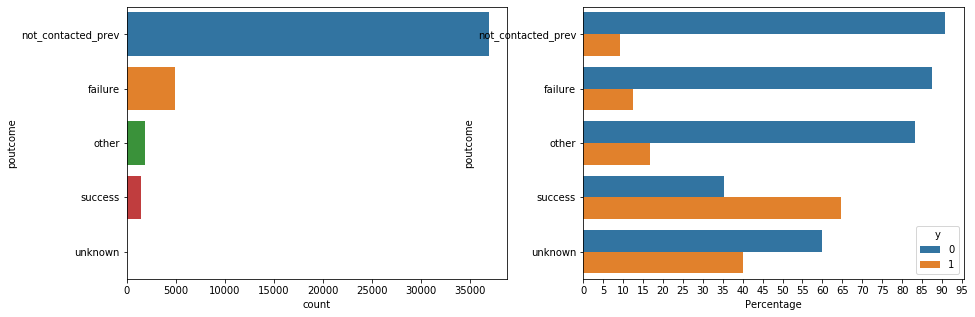

In [33]:
print("Analysis of feature : 'Poutcome'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='poutcome',order=df['poutcome'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['poutcome']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='poutcome',x='Percentage',hue='y',data=prop_df,order=df['poutcome'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [34]:
prop_df

,poutcome,y,Percentage
0,failure,0,87.390329
1,failure,1,12.609671
2,not_contacted_prev,0,90.842669
3,not_contacted_prev,1,9.157331
4,other,0,83.315217
5,other,1,16.684783
6,success,1,64.725347
7,success,0,35.274653
8,unknown,0,60.000000
9,unknown,1,40.000000


Majority of the people have not been contacted in the previous campaign for term deposit.

The people who have subscribed for a term deposit in the previous campaign has 65% chances of subscribing it again in the current campaign. These customers can be targeted more to increase the rate of subscription.

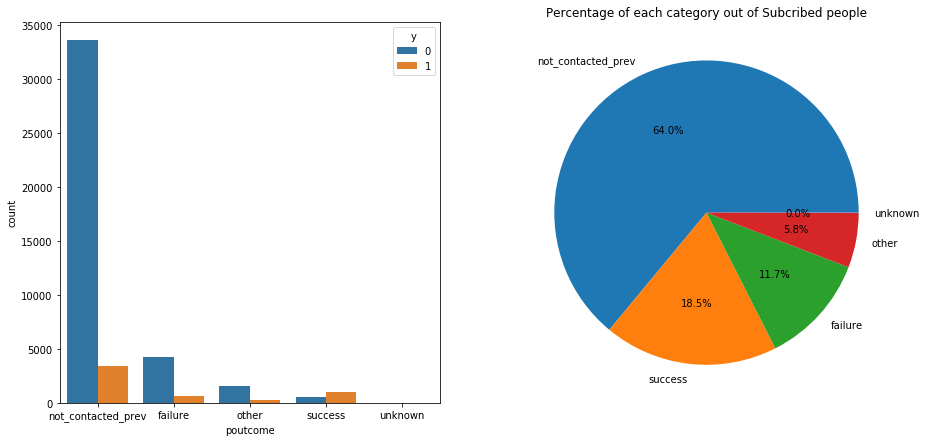

In [25]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(x='poutcome',data=df,hue='y',ax=ax1[0])
prop_df = (df['poutcome'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['poutcome'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed people, most of the people are not contacted in the previous campaign, followed by people who subscribed for term deposit inthe previous campaign.

### 2. Job

In [31]:
df['job'].value_counts(normalize=True)

blue-collar      0.215257
management       0.209197
technician       0.168034
admin.           0.114375
services         0.091880
retired          0.050076
self-employed    0.034925
entrepreneur     0.032890
unemployed       0.028820
housemaid        0.027427
student          0.020747
unknown          0.006370
Name: job, dtype: float64

There are 12 categories present in the job feature, in which one is 'unknown'.

Blue collar jobs followed by management jobs and technician jobs are most common in the dataset.

In [28]:
df[df['job']=='unknown'].shape

(288, 17)

In [29]:
df[(df['job']=='unknown') & (df['pdays']==-1)].shape

(255, 17)

There are 288 'unknown' values(0.637%) present in the field 'job'. Out of which the majority of the records (255) are of people who were not contacted in the previous campaign.

Analysis of feature : 'Job'


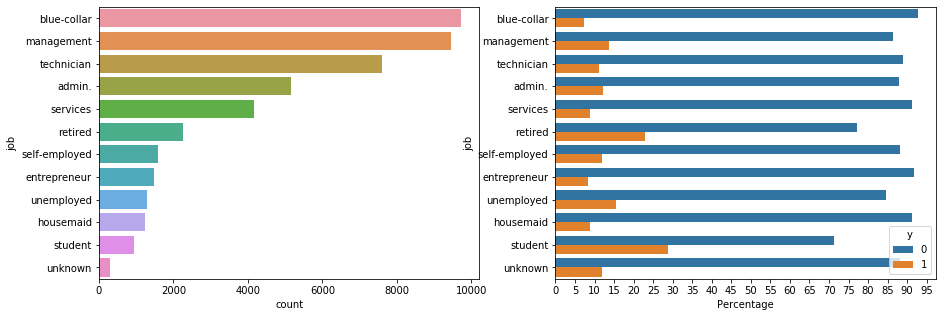

In [35]:
print("Analysis of feature : 'Job'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='job',order=df['job'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['job']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='job',x='Percentage',hue='y',data=prop_df,order=df['job'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [41]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,job,y,Percentage
17,student,1,28.678038
11,retired,1,22.791519
21,unemployed,1,15.502686
9,management,1,13.755551
1,admin.,1,12.202669
13,self-employed,1,11.842939
23,unknown,1,11.805556
19,technician,1,11.056996
15,services,1,8.883004
7,housemaid,1,8.790323


Students and retired customers are more likely to subscribe to the term deposit compared to other job categories.

These customers can be targeted more to increase the rate of subscription.

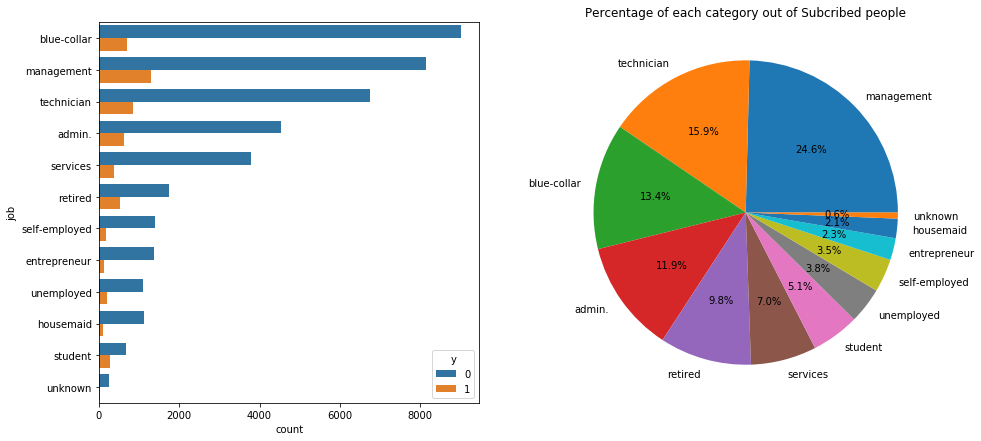

In [46]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='job',data=df,hue='y',order=df['job'].value_counts().index,ax=ax1[0])
prop_df = (df['job'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['job'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most common jobs are 'management' followed by 'technician' and 'blue collar' jobs.

### 3. Education

In [47]:
df['education'].value_counts(normalize=True)

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

There are 4 categories present in the education feature, in which one is 'unknown'.

51% of the customers are having secondary education.

In [48]:
df[df['education']=='unknown'].shape

(1857, 17)

In [49]:
df[(df['education']=='unknown') & (df['pdays']==-1)].shape

(1534, 17)

There are 1857 'unknown' values(4.1%) present in the field 'education'. Out of which the majority of the records (1534) are of people who were not contacted in the previous campaign.

Analysis of feature : 'Education'


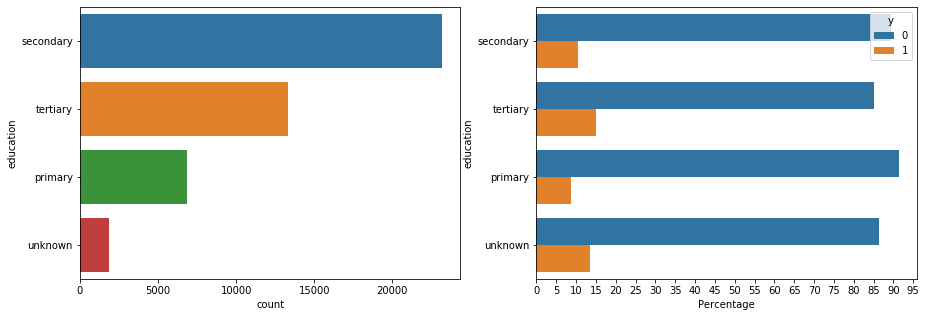

In [50]:
print("Analysis of feature : 'Education'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='education',order=df['education'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['education']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='education',x='Percentage',hue='y',data=prop_df,order=df['education'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [51]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,education,y,Percentage
5,tertiary,1,15.006390
7,unknown,1,13.570275
3,secondary,1,10.559435
1,primary,1,8.626478


The customers with teritiary level of education has slightly higher chances of subscription of the term deposit, compared to other education levels.

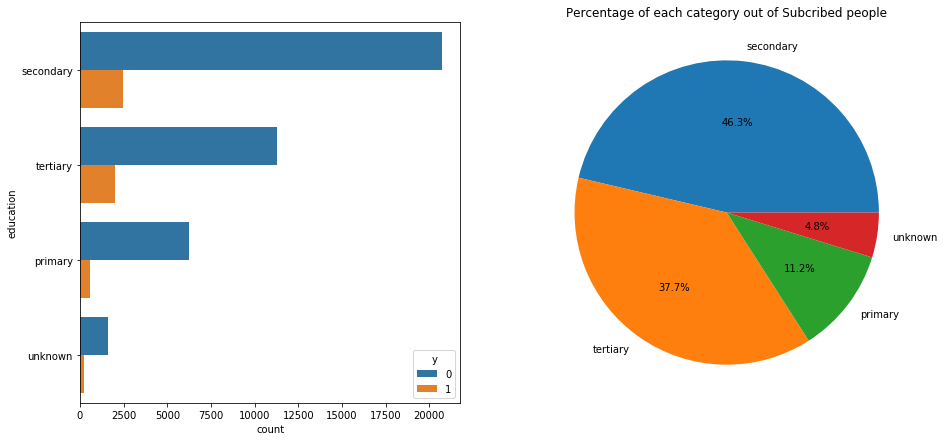

In [53]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='education',data=df,hue='y',order=df['education'].value_counts().index,ax=ax1[0])
prop_df = (df['education'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['education'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers have secondary level of education followed by teritiary.

### 4. Marital

In [55]:
df['marital'].value_counts(normalize=True)

married     0.601933
single      0.282896
divorced    0.115171
Name: marital, dtype: float64

There are 3 categories present in the marital feature.

60% of the customers are married.

Analysis of feature : 'Marital'


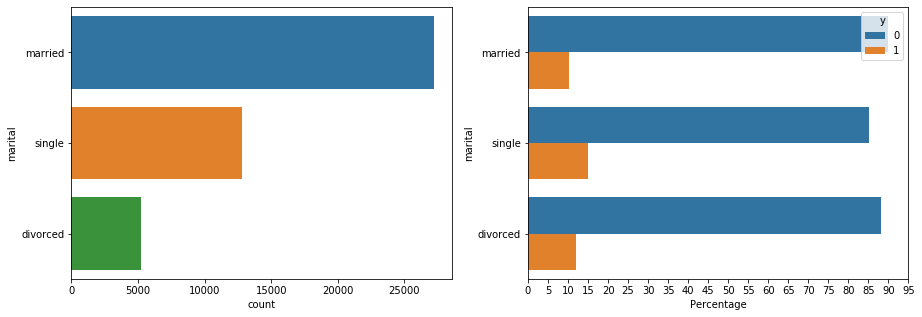

In [56]:
print("Analysis of feature : 'Marital'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='marital',order=df['marital'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['marital']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='marital',x='Percentage',hue='y',data=prop_df,order=df['marital'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [57]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,marital,y,Percentage
5,single,1,14.949179
1,divorced,1,11.945458
3,married,1,10.123466


The customers who are single has a slightly higher chances of subscription of the term deposit compared to customers who are married or divorced.

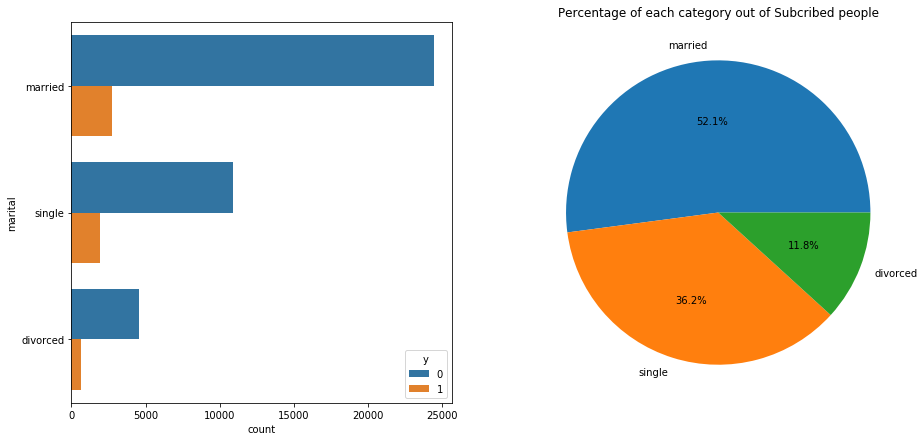

In [58]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='marital',data=df,hue='y',order=df['marital'].value_counts().index,ax=ax1[0])
prop_df = (df['marital'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['marital'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers are married followed by single customers.

### 5. Default

In [59]:
df['default'].value_counts(normalize=True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

98 % of the customers are do not have any credit in default.

Analysis of feature : 'Default'


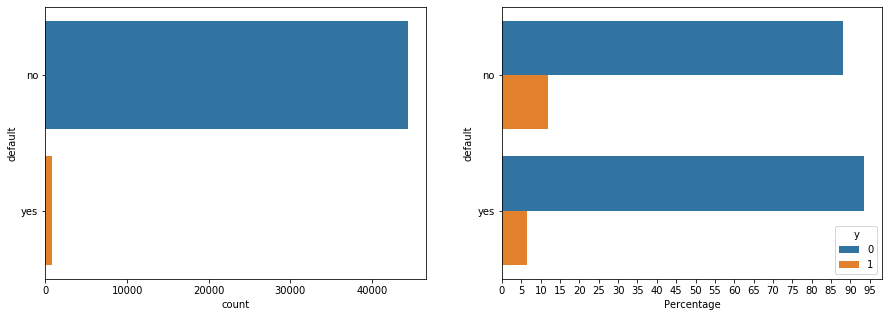

In [61]:
print("Analysis of feature : 'Default'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='default',order=df['default'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['default']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='default',x='Percentage',hue='y',data=prop_df,order=df['default'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [62]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,default,y,Percentage
1,no,1,11.796108
3,yes,1,6.380368


The customers who do not have any credits in default, has a slightly higher chances of subscription of the term deposit compared to customers who have credits in default.

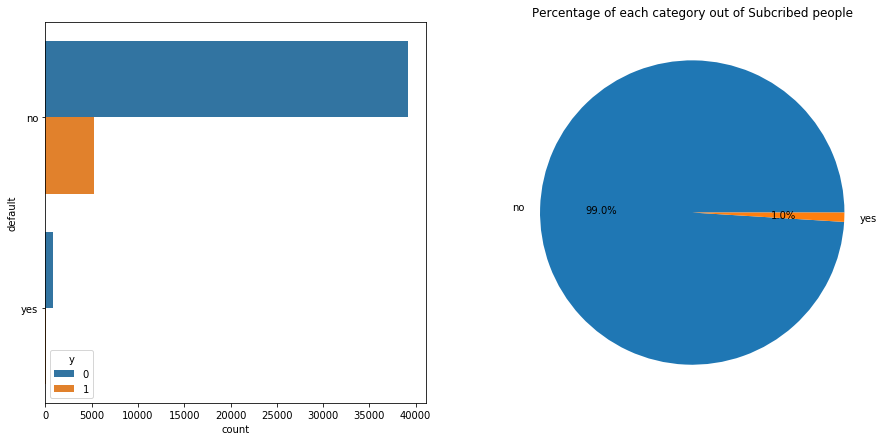

In [63]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='default',data=df,hue='y',order=df['default'].value_counts().index,ax=ax1[0])
prop_df = (df['default'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['default'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers do not have any credits in default.

### 6. Housing

In [64]:
df['housing'].value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

55.5% of the customers have taken housing loans while the other 45.5% do not have any housing loans in their name.

Analysis of feature : 'Housing'


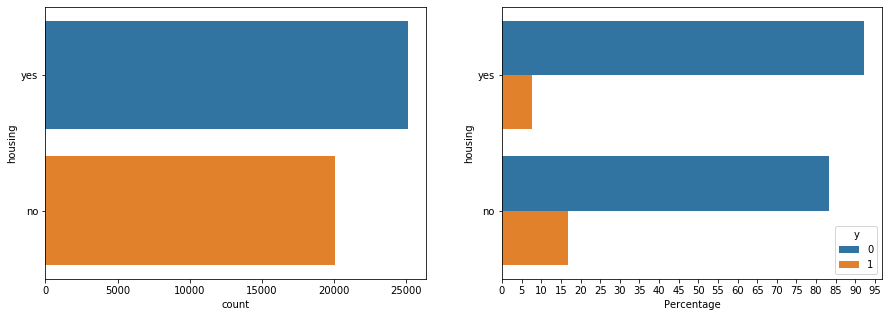

In [65]:
print("Analysis of feature : 'Housing'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='housing',order=df['housing'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['housing']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='housing',x='Percentage',hue='y',data=prop_df,order=df['housing'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [66]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,housing,y,Percentage
1,no,1,16.702355
3,yes,1,7.699960


The customers who do not have a housing loan has a slightly higher chances of subscription of the term deposit compared to customers who already have a housing loan.

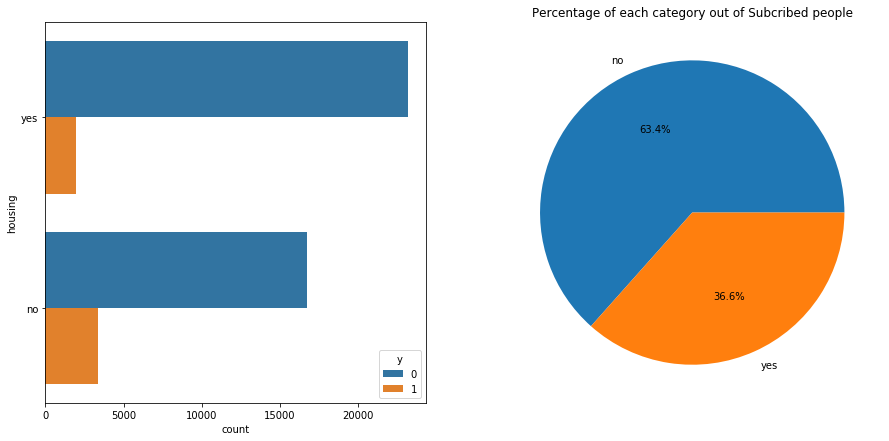

In [68]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='housing',data=df,hue='y',order=df['housing'].value_counts().index,ax=ax1[0])
prop_df = (df['housing'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['housing'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers do not have housing loans.

### 7. Loan

In [64]:
df['housing'].value_counts(normalize=True)

yes    0.555838
no     0.444162
Name: housing, dtype: float64

55.5% of the customers have taken housing loans while the other 45.5% do not have any housing loans in their name.

Analysis of feature : 'Housing'


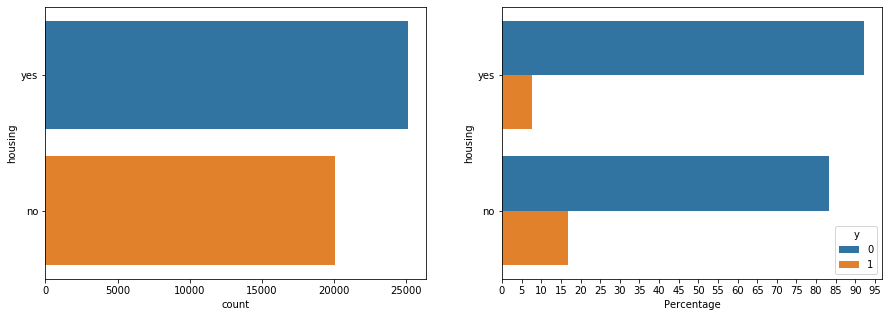

In [65]:
print("Analysis of feature : 'Housing'")
fig, ax1 = plt.subplots(1,2,figsize=(15,5))
sns.countplot(y='housing',order=df['housing'].value_counts().index,data=df,ax=ax1[0])
prop_df = (df['y'].groupby(df['housing']).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
sns.barplot(y='housing',x='Percentage',hue='y',data=prop_df,order=df['housing'].value_counts().index,ax=ax1[1])
ax1[1].set(xticks = np.array(range(0,100,5)))
plt.show()

In [66]:
prop_df[prop_df['y']==1].sort_values(by='Percentage',ascending=False)

,housing,y,Percentage
1,no,1,16.702355
3,yes,1,7.699960


The customers who do not have a housing loan has a slightly higher chances of subscription of the term deposit compared to customers who already have a housing loan.

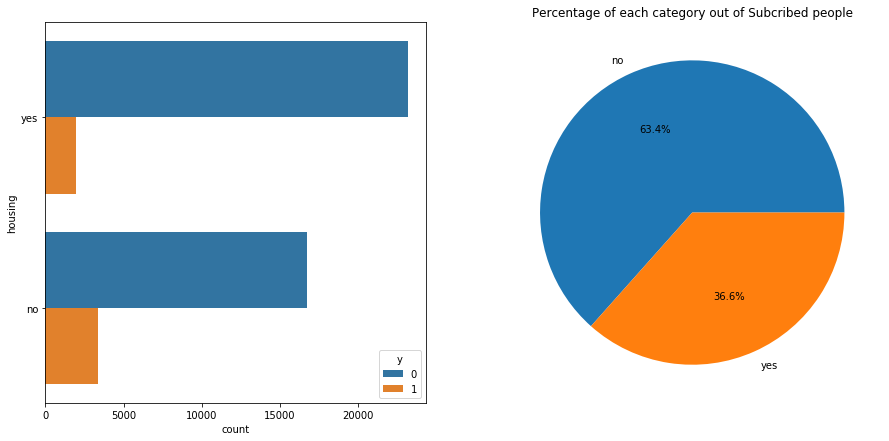

In [68]:
fig, ax1 = plt.subplots(1,2,figsize=(15,7))
sns.countplot(y='housing',data=df,hue='y',order=df['housing'].value_counts().index,ax=ax1[0])
prop_df = (df['housing'].groupby(df['y']).value_counts().rename('Values').reset_index())
prop_df = prop_df[prop_df['y']==1]
plt.pie(prop_df['Values'],labels=prop_df['housing'],autopct='%1.1f%%')
ax1[1].set_title("Percentage of each category out of Subcribed people")
plt.show()

Out of the subscribed customers, most customers do not have housing loans.

In [27]:
cat_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [34]:
df[df['education']=='unknown'].shape

(1857, 17)

In [35]:
df[(df['education']=='unknown') & (df['pdays']==-1)].shape

(1534, 17)

In [36]:
df[df['contact']=='unknown'].shape

(13020, 17)

In [37]:
df[(df['contact']=='unknown') & (df['pdays']==-1)].shape

(12950, 17)

Most of the records with 'unkowns' as a category in the features - job, education,contact and poutcome are data of people who haven't been contacted in the previous campaign.

In [28]:
num_cols = df.select_dtypes('int64').columns

### Outliers

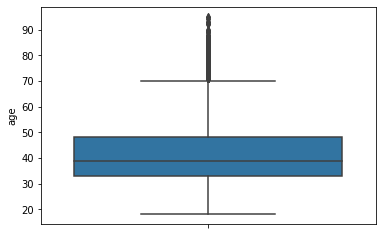

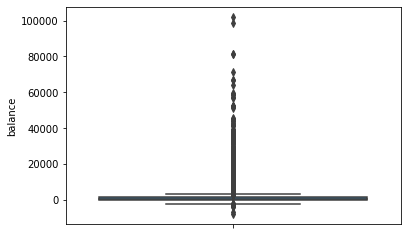

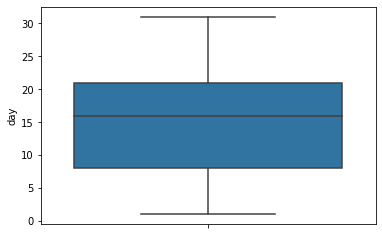

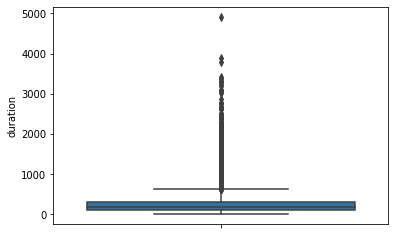

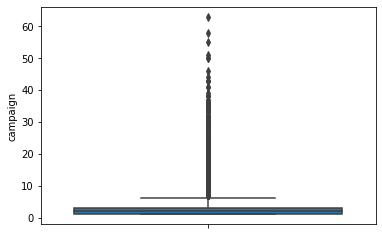

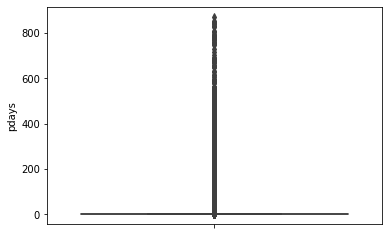

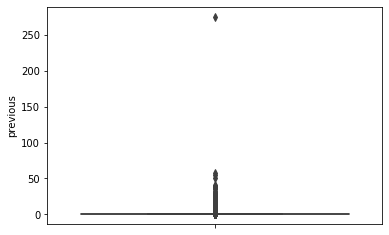

In [29]:
for i in num_cols:
    sns.boxplot(y=i,data = df)
    plt.show()

All numerical variables have high outliers.

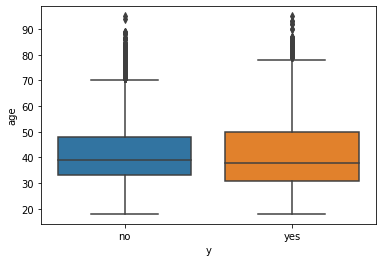

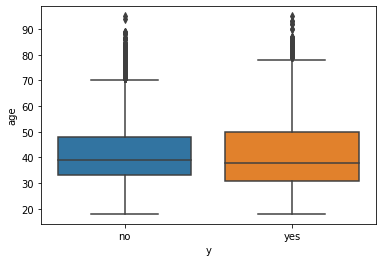

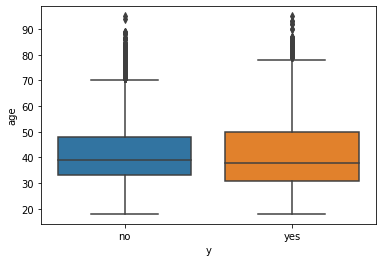

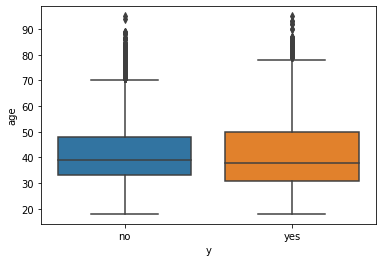

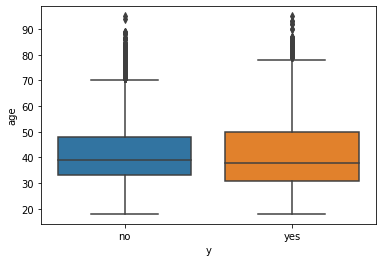

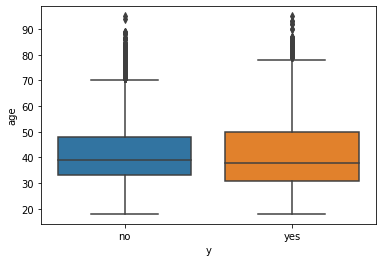

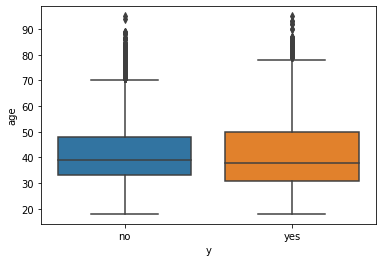

In [30]:
for i in num_cols:
    sns.boxplot(y='age',x='y',data = df)
    plt.show()

In [31]:
#df_log = df[num_cols]
#df_log.apply(np.log)

### Correlations

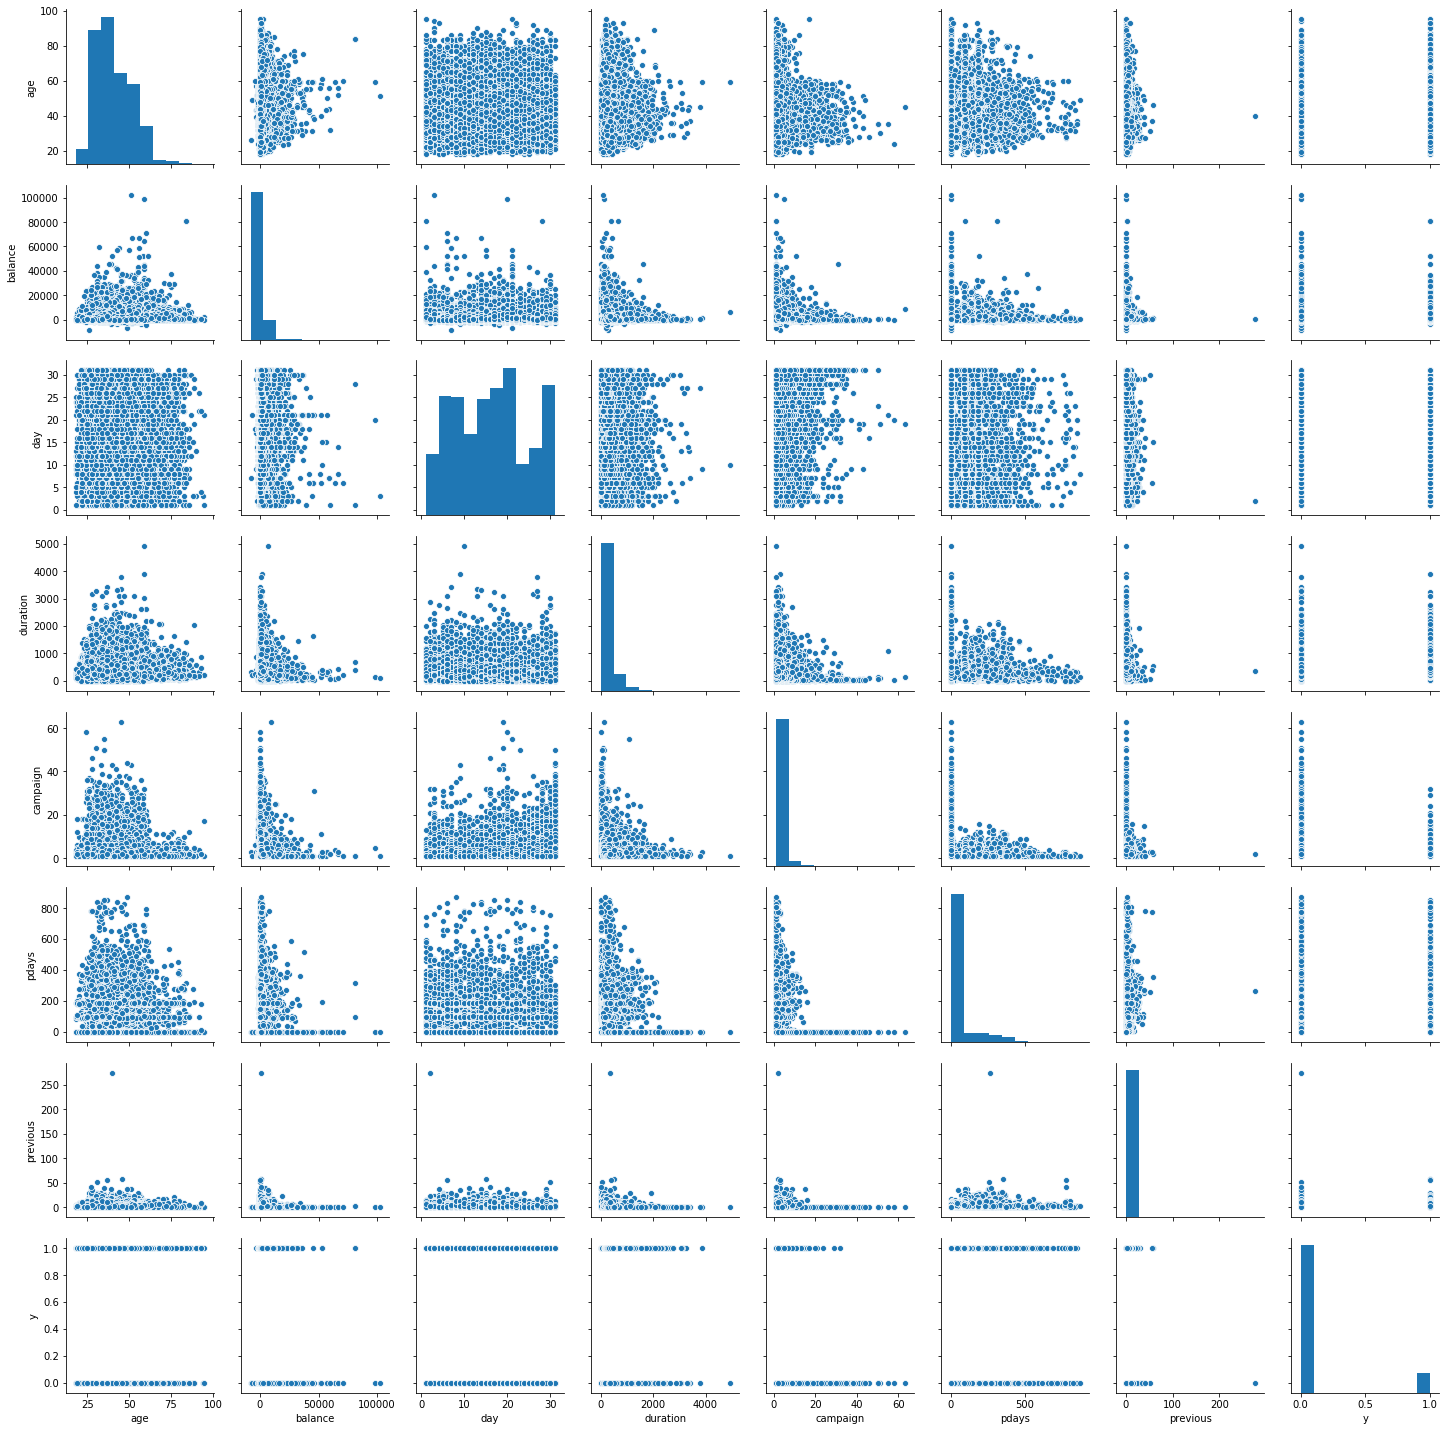

In [32]:
sns.pairplot(df2)

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


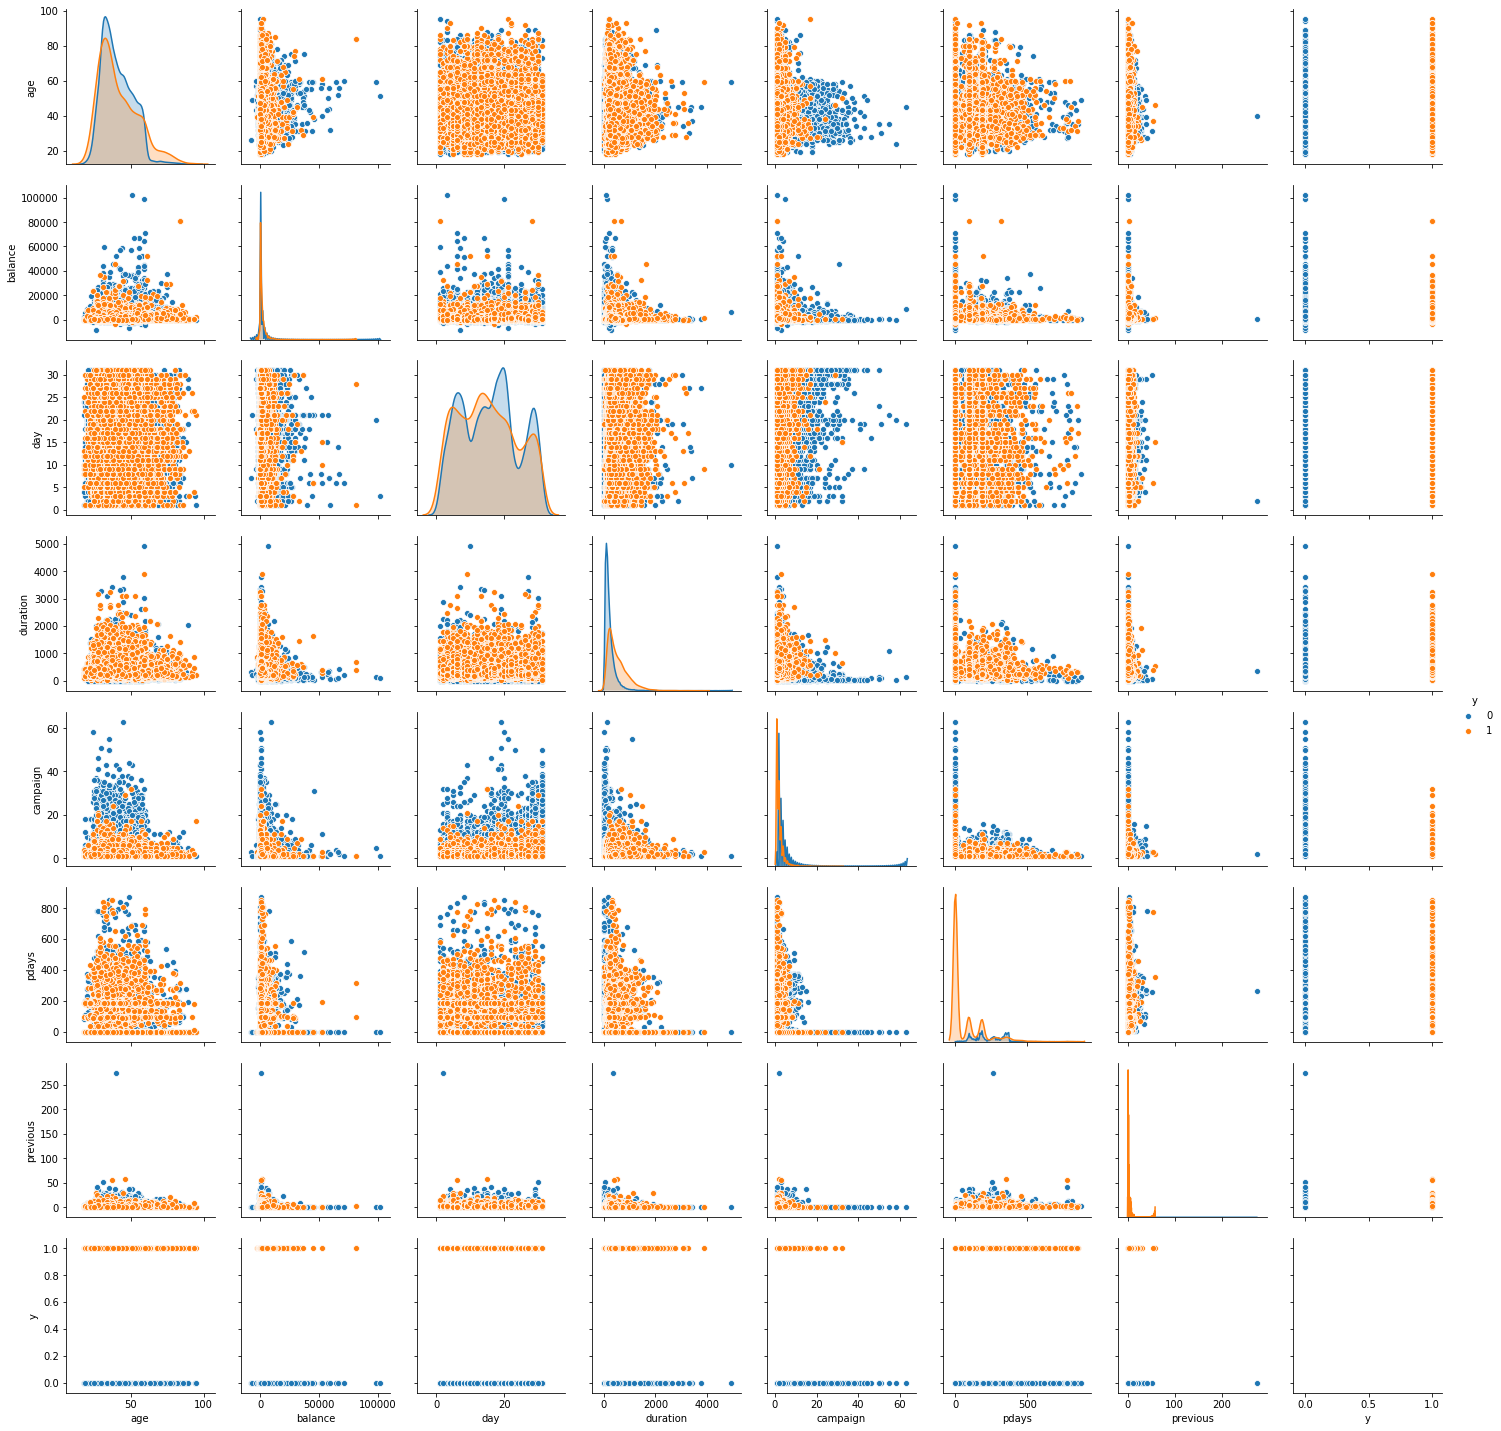

In [33]:
sns.pairplot(df2,hue='y')

In [34]:
df2.corr()

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


No considerable correlations present between features

### Numerical Variable analysis

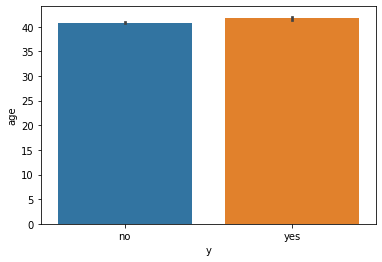

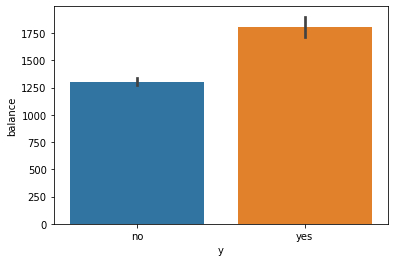

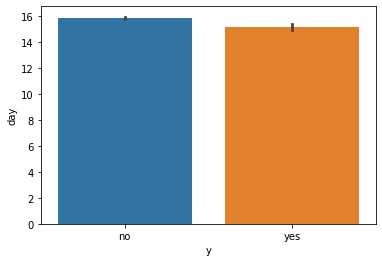

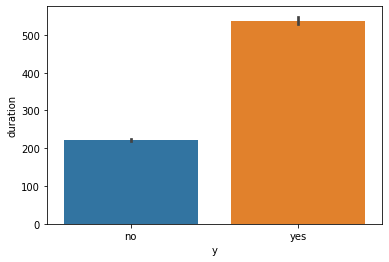

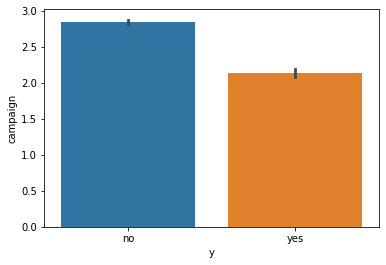

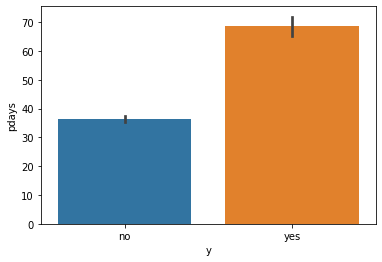

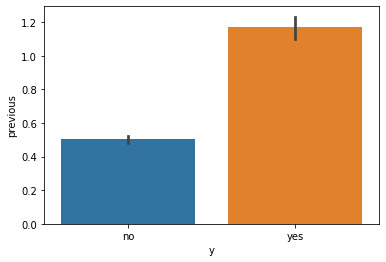

In [35]:
for i in num_cols:
    sns.barplot(x='y',y=i,data = df)
    plt.show()

Balance, duration,campaign, pdays, previous are having considerable difference in both classes.

### Distributions

In [36]:
df0=df[df['y']=='no']
df1=df[df['y']=='yes']

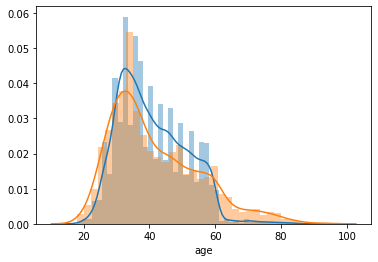

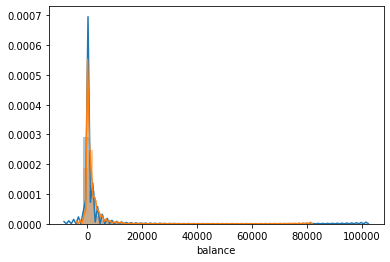

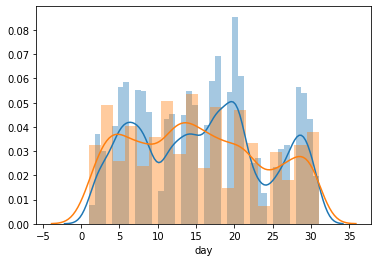

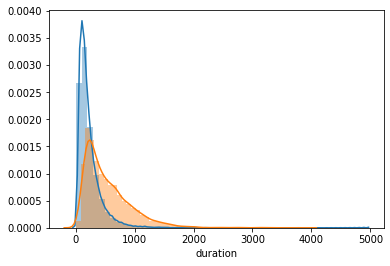

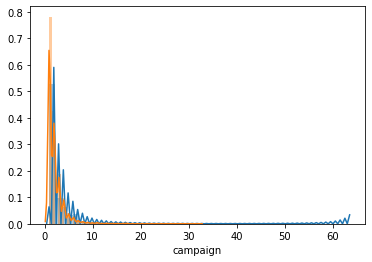

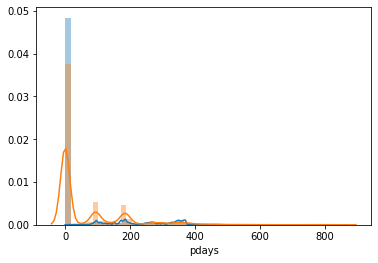

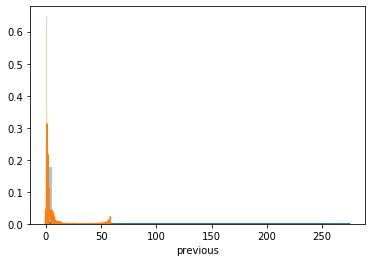

In [37]:
for i in num_cols:
    sns.distplot(df0[i])
    sns.distplot(df1[i])
    plt.show()

In [150]:
cat_col1 = df2.select_dtypes('object').columns
cat_col1

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'prev_contacted'],
      dtype='object')

In [142]:
df2['prev_contacted'] = list(map(lambda x : 'Yes' if x != -1 else 'No',df2['pdays']))

In [143]:
df2[df2['prev_contacted']=='Yes']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,prev_contacted
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,0,Yes
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,1,Yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,1,Yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,0,Yes
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,0,Yes
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,1,Yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1,Yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,Yes


Analysis of feature :  job


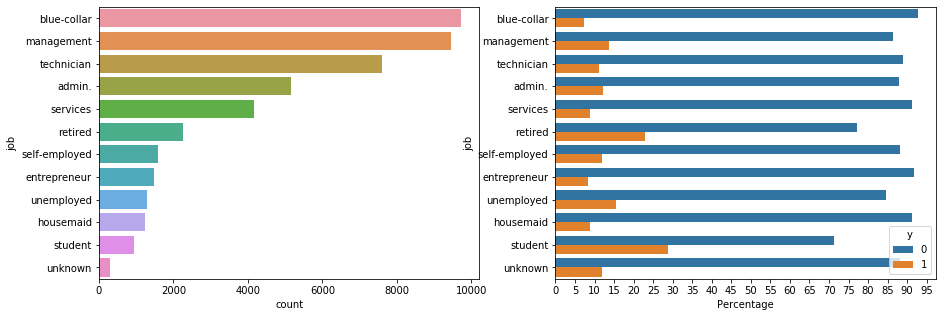

Analysis of feature :  marital


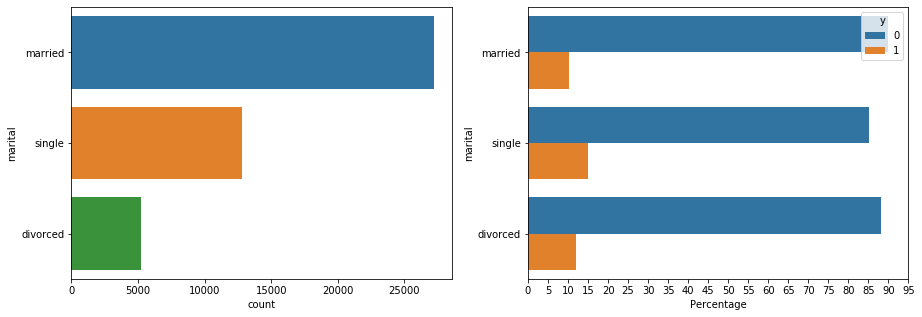

Analysis of feature :  education


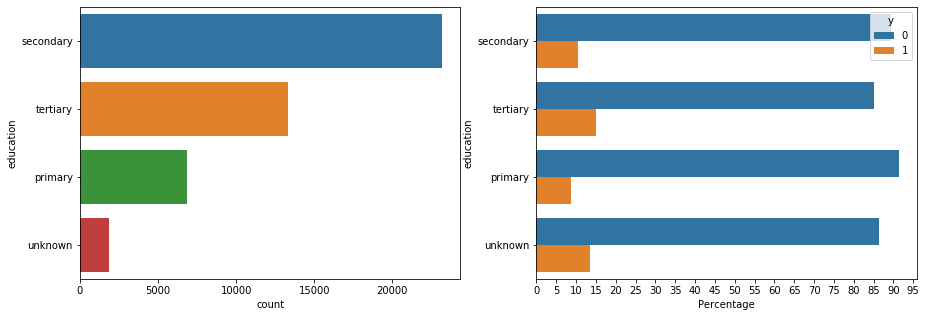

Analysis of feature :  default


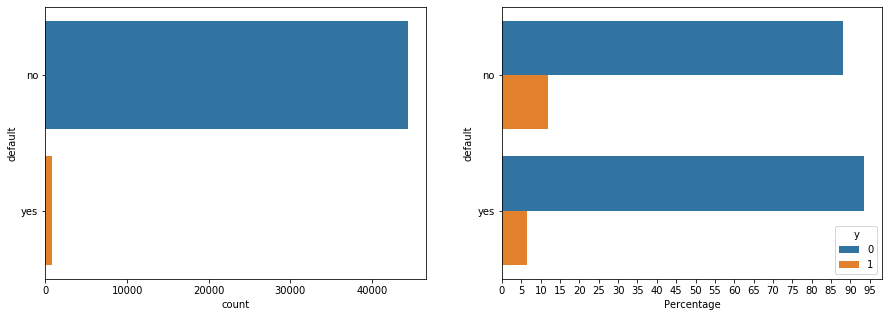

Analysis of feature :  housing


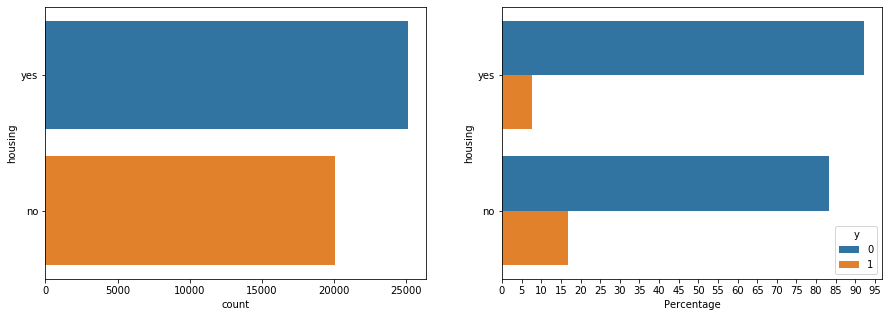

Analysis of feature :  loan


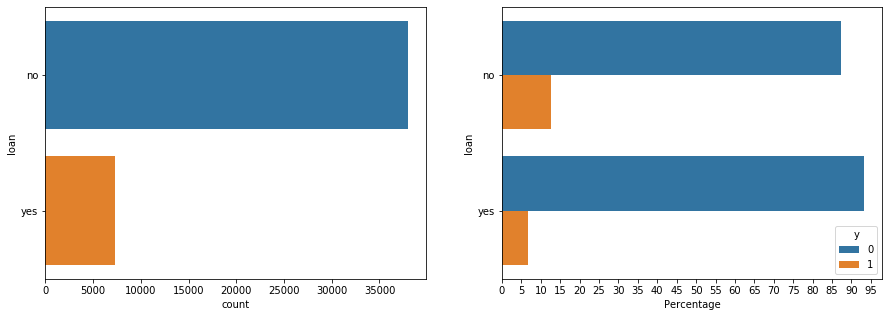

Analysis of feature :  contact


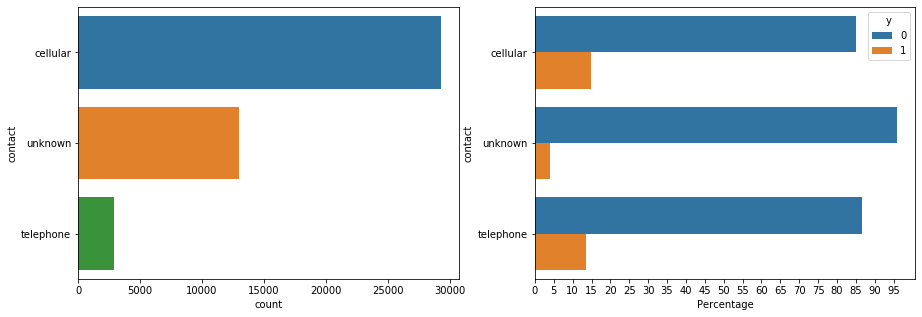

Analysis of feature :  month


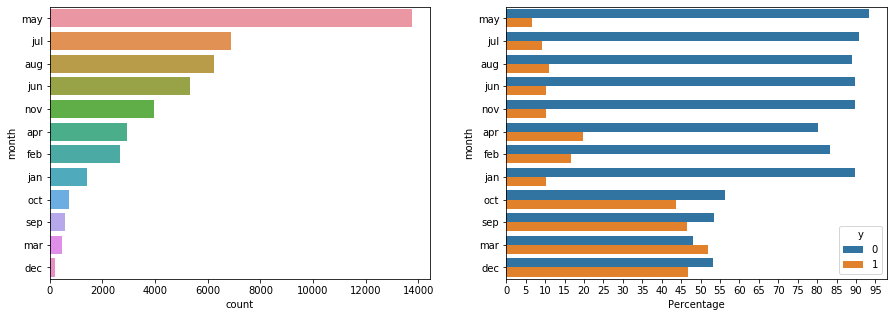

Analysis of feature :  poutcome


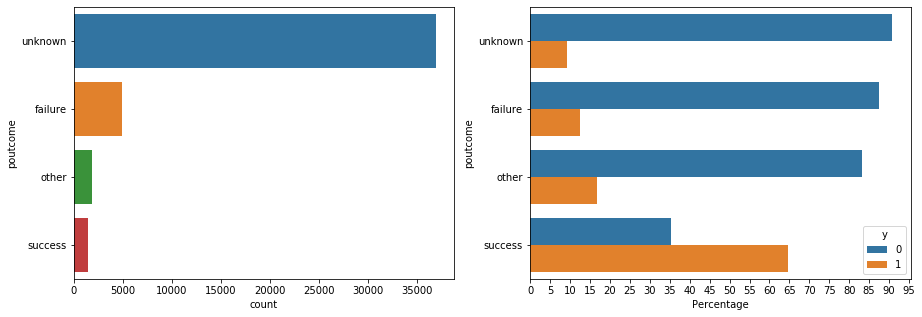

Analysis of feature :  prev_contacted


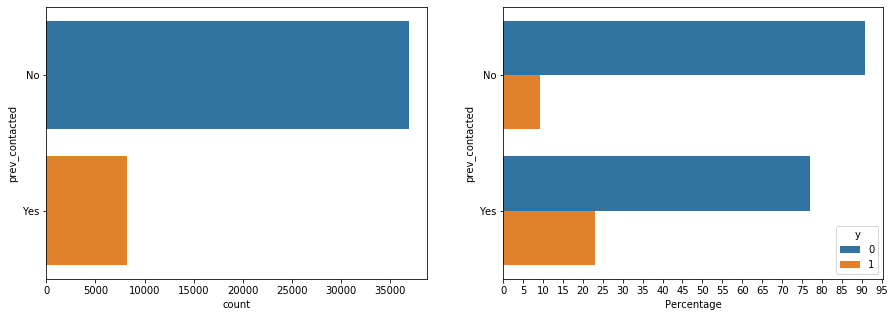

In [152]:
#fig, ax1 = plt.subplots(figsize=(15,5))
#plt.figure(figsize=(15,5))

for col in cat_col1:
    print("Analysis of feature : ",col)
    fig, ax1 = plt.subplots(1,2,figsize=(15,5))
    #sns.countplot(y=col,order=df[col].value_counts().index,hue='y',data=df,ax=ax1[0])
    sns.countplot(y=col,order=df2[col].value_counts().index,data=df2,ax=ax1[0])
    prop_df = (df2['y'].groupby(df2[col]).value_counts(normalize=True).mul(100).rename('Percentage').reset_index())
    sns.barplot(y=col,x='Percentage',hue='y',data=prop_df,order=df2[col].value_counts().index,ax=ax1[1])
    ax1[1].set(xticks = np.array(range(0,100,5)))
    plt.show()

Job:- Most contacted - Blue collar, campaign successful mostly among students followed by retired people.

Marital- Most contacted - Married, campaign successful mostly among single people.

Education - Most contacted - Secondary, campaign successful mostly among people with teritiary education.

Default - Most contacted - people with no defaults, campaign successful mostly among people with no defaults

Housing - Most contacted - people who have taken housing loans, campaign successful mostly among people who have not taken housing loans

Loan - Most contacted - people who have taken housing loans, campaign successful mostly among people who have not taken housing loans

Contact - Most contacted - Cellular, campaign successful in similar rates among people contacted through telephone as well as cellular.

Month -  Most contacted - May, campaign successful mostly among people contacted during the months March, December, September and October.

In [133]:
for col in cat_col1:
    print("Analysis of feature : ",col)
    print(df2.groupby(col)['y'].value_counts(normalize=True))

Analysis of feature :  job
job            y
admin.         0    0.877973
               1    0.122027
blue-collar    0    0.927250
               1    0.072750
entrepreneur   0    0.917283
               1    0.082717
housemaid      0    0.912097
               1    0.087903
management     0    0.862444
               1    0.137556
retired        0    0.772085
               1    0.227915
self-employed  0    0.881571
               1    0.118429
services       0    0.911170
               1    0.088830
student        0    0.713220
               1    0.286780
technician     0    0.889430
               1    0.110570
unemployed     0    0.844973
               1    0.155027
unknown        0    0.881944
               1    0.118056
Name: y, dtype: float64
Analysis of feature :  marital
marital   y
divorced  0    0.880545
          1    0.119455
married   0    0.898765
          1    0.101235
single    0    0.850508
          1    0.149492
Name: y, dtype: float64
Analysis of feature :  ed

In [134]:
df[df['campaign']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


All are contacted during the current campaign. 